In [18]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# File system manangement
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('telco_customer_churn.csv')
data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Model 1: Logistic Regression

In [20]:
encoded_data = pd.get_dummies(data.drop(["customer_ID","charges_total"],axis=1))
encoded_data

,senior_citizen,tenure,charges_per_month,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_Service_No,phone_Service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_DSL,internet_Fiber optic,internet_No,security_online_No,security_online_No internet service,security_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check,churn_No,churn_Yes
0,0,1,29.85,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [21]:
independent_encoded_data=encoded_data.drop(["churn_No","churn_Yes"],axis=1)
independent_encoded_data

,senior_citizen,tenure,charges_per_month,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_Service_No,phone_Service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_DSL,internet_Fiber optic,internet_No,security_online_No,security_online_No internet service,security_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check
0,0,1,29.85,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [30]:
lr = LogisticRegression()

lr.fit(independent_encoded_data, encoded_data["churn_Yes"])

LogisticRegression()

In [23]:
X = independent_encoded_data
y = encoded_data["churn_Yes"]

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [31]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.7963094393186657
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [32]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.77698864 0.79261364 0.7929078  0.796875   0.79971591 0.80141844
 0.80539773 0.81107955 0.81134752 0.81960227]
0.8007946486137975


In [37]:
lr = LogisticRegression()

lr.fit(independent_encoded_data, encoded_data["churn_Yes"])


def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groundtruth
    """

    return np.sqrt(np.mean((actual_y - predicted_y)**2))

train_error = rmse(train_y,lr.predict(train_X))
test_error = rmse(test_y,lr.predict(test_X))

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

NameError: name 'test_y' is not defined

In [38]:

train_error_vs_N = []
test_error_vs_N = []

range_of_num_features = range(1, X_train.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train)
    train_error_overfit = rmse(Y_train, linear_model.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = X_test.iloc[:, :N]
    test_error_overfit = rmse(Y_test, linear_model.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('RMSE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("RMSE");

NameError: name 'X_train' is not defined

Linear Regression

In [ ]:
ln = LinearRegression()

ln.fit(independent_encoded_data, encoded_data["churn_Yes"])

Decision Trees

In [86]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

[Text(112.43987848381782, 213.816, 'X[36] <= 0.5\ngini = 0.389\nsamples = 6338\nvalue = [4659, 1679]'),
 Text(33.79530905157394, 206.56799999999998, 'X[2] <= 93.675\ngini = 0.126\nsamples = 2837\nvalue = [2645, 192]'),
 Text(15.873006446741783, 199.32, 'X[37] <= 0.5\ngini = 0.075\nsamples = 2150\nvalue = [2066, 84]'),
 Text(9.29459867580439, 192.072, 'X[43] <= 0.5\ngini = 0.03\nsamples = 1174\nvalue = [1156, 18]'),
 Text(6.766778952259264, 184.824, 'X[0] <= 0.5\ngini = 0.023\nsamples = 1102\nvalue = [1089, 13]'),
 Text(4.511185968172843, 177.576, 'X[1] <= 59.5\ngini = 0.017\nsamples = 1026\nvalue = [1017, 9]'),
 Text(2.488930189336741, 170.328, 'X[1] <= 52.5\ngini = 0.028\nsamples = 497\nvalue = [490, 7]'),
 Text(0.6222325473341852, 163.07999999999998, 'X[2] <= 24.475\ngini = 0.015\nsamples = 387\nvalue = [384, 3]'),
 Text(0.3111162736670926, 155.832, 'gini = 0.0\nsamples = 203\nvalue = [203, 0]'),
 Text(0.9333488210012778, 155.832, 'X[2] <= 24.525\ngini = 0.032\nsamples = 184\nvalue =

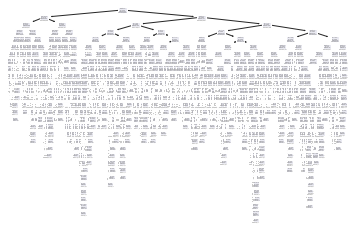

In [87]:
tree.plot_tree(clf)

This means we have to be selective in the features used for the decision tree model.